In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan gaya visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# Load dataset
file_path = 'penjualan_mobil_toyota.csv'
data = pd.read_csv(file_path)

# Menampilkan 5 baris pertama data
print("5 data teratas:")
print(data.head())

# Informasi kolom dan tipe data
print("\nInformasi dataset:")
print(data.info())


5 data teratas:
     Bulan  Penjualan
0  2011-01      27619
1  2011-02      25532
2  2011-03      32275
3  2011-04      21128
4  2011-05      19554

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bulan      149 non-null    object
 1   Penjualan  149 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB
None


In [4]:
# Konversi kolom 'Bulan' ke tipe datetime
data['Bulan'] = pd.to_datetime(data['Bulan'], format='%Y-%m')

# Menyetel kolom 'Bulan' sebagai index untuk analisis time series
data.set_index('Bulan', inplace=True)

# Menampilkan 5 data teratas setelah preprocessing
print("5 data teratas setelah preprocessing:")
print(data.head())

5 data teratas setelah preprocessing:
            Penjualan
Bulan                
2011-01-01      27619
2011-02-01      25532
2011-03-01      32275
2011-04-01      21128
2011-05-01      19554


In [5]:
# Statistik deskriptif
print("Statistik deskriptif data penjualan:")
print(data['Penjualan'].describe())

Statistik deskriptif data penjualan:
count      149.000000
mean     28402.845638
std       7579.399557
min        695.000000
25%      25081.000000
50%      29362.000000
75%      33344.000000
max      40781.000000
Name: Penjualan, dtype: float64


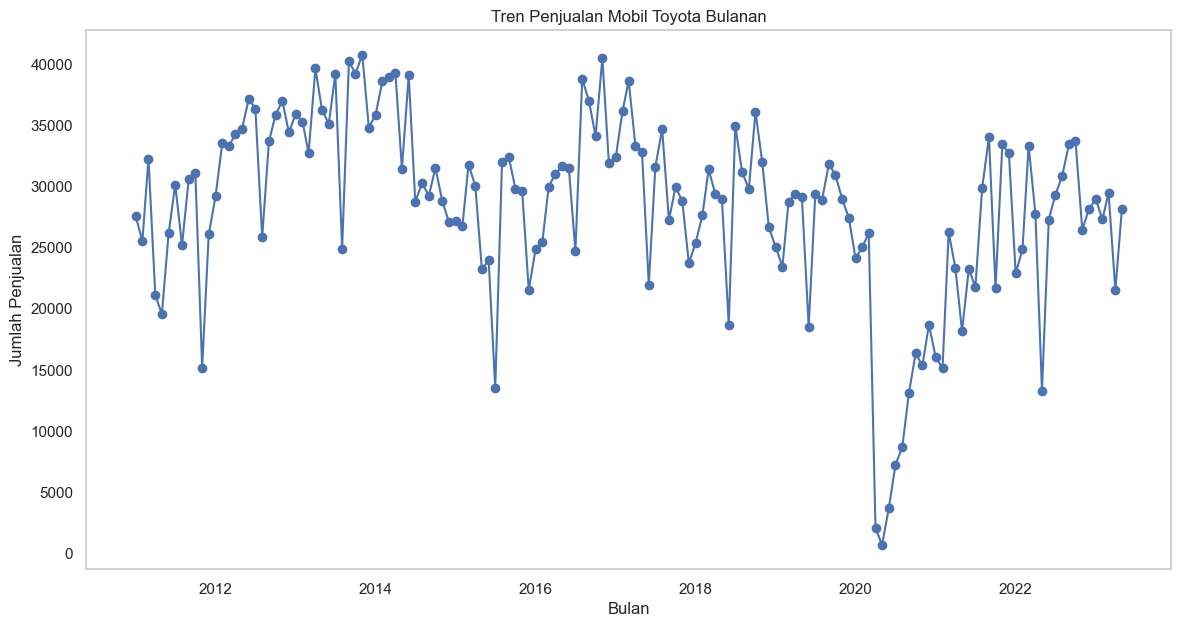

In [6]:
# Visualisasi tren penjualan bulanan
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Penjualan'], marker='o', linestyle='-', color='b')
plt.title('Tren Penjualan Mobil Toyota Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid()
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Mengatur frekuensi data secara eksplisit
data = data.asfreq('MS')  # MS berarti "Month Start", frekuensi bulanan

# Mengecek stasioneritas data
adf_test = adfuller(data['Penjualan'])
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# Jika data tidak stasioner, lakukan differencing (Opsional)
data_diff = data['Penjualan'].diff().dropna()

# Inisialisasi dan fit model ARIMA (p, d, q)=(1, 1, 1) sebagai contoh
model = ARIMA(data['Penjualan'], order=(1, 1, 1), freq='MS')
model_fit = model.fit()

# Melihat ringkasan hasil model
print(model_fit.summary())

# Prediksi untuk beberapa bulan ke depan
forecast = model_fit.forecast(steps=12)
print("Prediksi penjualan untuk 12 bulan ke depan:")
print(forecast)

ADF Test Statistic: -3.0353681241549246
p-value: 0.031720888942554065
                               SARIMAX Results                                
Dep. Variable:              Penjualan   No. Observations:                  149
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1488.422
Date:                Wed, 13 Nov 2024   AIC                           2982.843
Time:                        21:56:38   BIC                           2991.835
Sample:                    01-01-2011   HQIC                          2986.497
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1941      0.150      1.295      0.195      -0.100       0.488
ma.L1         -0.6766      0.125     -5.394      0.000      -